In [1471]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/data_clean_bfclean.csv', encoding='utf-8')

In [1472]:
# df.sample(5)
df.head()
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_M
0,กอบ,104.0,PUTNAM,Y,3.0,1,1000
1,แนน,197.0,LETON,n,3.0,1,--
2,Lam,NaN,LETON,N,NaN,1,850
3,Ninan,201.0,BEREY,N,1.0,-2,700.5
4,Nii,NaN,BEREY,Y,2.0,2ABC,1600
5,Tom,207.0,BEREY,Y,3.0,1.5,800.8
6,Green,NaN,WAGTON,NaN,2.0,3,950
7,Shasa,213.0,TREMONT,Y,1.0,1,NaN
8,Alisa,215.0,TREMONT,Y,2.0,2,1800
9,Ksb,216.0,TREMONT,n,2.0,2,90.5


In [1473]:
# df.info()
df.dtypes

PID              object
ST_NUM          float64
ST_NAME          object
OWN_OCCUPIED     object
NUM_BEDROOMS    float64
NUM_BATH         object
SQ_M             object
dtype: object

In [1474]:
# ws02
df.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_M'],
      dtype='object')

In [1475]:
to_drop = ['ST_NUM', 'ST_NAME']

to_drop 

['ST_NUM', 'ST_NAME']

In [1476]:
df.drop(columns=to_drop).sample(5) 
df.drop(columns=to_drop).head() 


,PID,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_M
0,กอบ,Y,3.0,1,1000
1,แนน,n,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600


In [1477]:
df.drop(columns=to_drop, inplace=True) 
df.head()


,PID,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_M
0,กอบ,Y,3.0,1,1000
1,แนน,n,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600


In [1478]:
# ws03
df = df.rename(columns={
  'PID':'id',
  'OWN_OCCUPIED':'own',
  'NUM_BEDROOMS':'bedroom',
  'NUM_BATH':'bathroom',
  'SQ_M':'area'})
df.head()

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,n,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600


In [1479]:
cols = [0, 1, 2, 3, 4] 
cols = list(range(0, 5))
newnames = ['id','own','bedroom','bathroom','area']
k = 0
str = 'columns={'
# print('columns={')
for i in cols:

    str += "\n  '{}':'{}',". format(df.columns[i], newnames[k])
    k+=1

print(str[:-1] + '}')   

columns={
  'id':'id',
  'own':'own',
  'bedroom':'bedroom',
  'bathroom':'bathroom',
  'area':'area'}


In [1480]:
df = df.rename(columns={
  'PID':'id',
  'OWN_OCCUPIED':'own',
  'NUM_BEDROOMS':'bedroom',
  'NUM_BATH':'bathroom',
  'SQ_M':'area'})
df.head()

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,n,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600


In [1481]:
df.to_csv('data/data_clean1_after_drop_column.csv', index=False)

In [1482]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,n,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,n,2.0,2,90.5


In [1483]:
df = pd.read_csv('data/data_clean1_after_drop_column.csv')

In [1484]:
# df.info()
df.dtypes

id           object
own          object
bedroom     float64
bathroom     object
area         object
dtype: object

In [1485]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,n,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,n,2.0,2,90.5


In [1486]:
df.isnull().sum()

id          0
own         1
bedroom     1
bathroom    0
area        1
dtype: int64

# check category var (own)

In [1487]:
df.isnull().sum()

id          0
own         1
bedroom     1
bathroom    0
area        1
dtype: int64

In [1488]:
colm = 'own'
df.groupby(colm)[colm].count()

own
12    1
N     2
Y     5
n     2
Name: own, dtype: int64

In [1489]:
colm = 'own'

df.groupby(colm).count()

,id,bedroom,bathroom,area
own,,,,
12,1,1,1,1
N,2,1,2,2
Y,5,5,5,4
n,2,2,2,2


In [1490]:
df.pivot_table(index='own', aggfunc='count')

,area,bathroom,bedroom,id
own,,,,
12,1,1,1,1
N,2,2,1,2
Y,4,5,5,5
n,2,2,2,2


<Axes: xlabel='own', ylabel='count'>

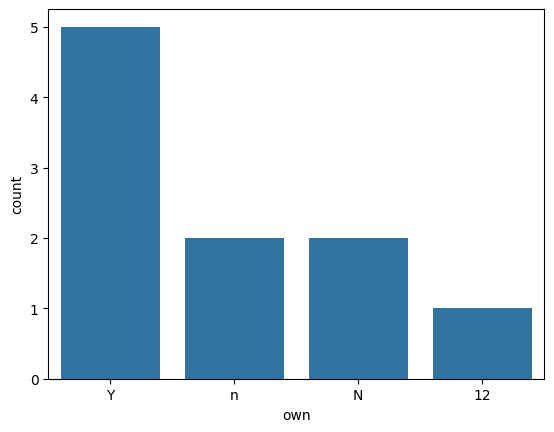

In [1491]:
%matplotlib inline
import seaborn as sns
sns.countplot(x='own', data=df)


In [1492]:
cols_to_check = df.select_dtypes(include='object').columns
cols_to_check = cols_to_check.append(df.select_dtypes(include='category').columns)
cols_to_check

Index(['id', 'own', 'bathroom', 'area'], dtype='object')

In [1493]:
cols_to_check = ['own', 'bathroom', 'area']
for colm in cols_to_check:
    print(colm)

    colm_vals = df[colm].unique()
    for k in colm_vals:
        print('   | {} ' . format(k))  
    print('-----------------------')

own
   | Y 
   | n 
   | N 
   | nan 
   | 12 
-----------------------
bathroom
   | 1 
   | -2 
   | 2ABC 
   | 1.5 
   | 3 
   | 2 
-----------------------
area
   | 1000 
   | -- 
   | 850 
   | 700.5 
   | 1600 
   | 800.8 
   | 950 
   | nan 
   | 1800 
   | 90.5 
   | 70.2 
-----------------------


In [1494]:
df.own = df.own.str.upper()  # also work with NaN , 12 still be there

In [1495]:
colm = 'own'
df.groupby(colm)[colm].count()

df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1496]:
df.to_csv('data/data_clean2_after_str_upper.csv', index=False)

In [1497]:
colm = 'bedroom'
df.groupby(colm)[colm].count()

bedroom
1.0    2
2.0    5
3.0    3
Name: bedroom, dtype: int64

In [1498]:
colm = 'bathroom'
# df.groupby(colm).count()
df.groupby(colm)[colm].count()

bathroom
-2      1
1       4
1.5     1
2       3
2ABC    1
3       1
Name: bathroom, dtype: int64

In [1499]:
cols_to_check = ['own', 'bedroom', 'bathroom']
for i,col in enumerate(cols_to_check):
#     print(col)
    print(df.groupby(col)[cols_to_check[i]].count().head(10)) 
    print('-----------------')

own
12    1
N     4
Y     5
Name: own, dtype: int64
-----------------
bedroom
1.0    2
2.0    5
3.0    3
Name: bedroom, dtype: int64
-----------------
bathroom
-2      1
1       4
1.5     1
2       3
2ABC    1
3       1
Name: bathroom, dtype: int64
-----------------


# manage own

In [1500]:
# ws05
df[df.own == 12] 


,id,own,bedroom,bathroom,area


In [1501]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom     object
area         object
dtype: object

In [1502]:
df[df.own == '12']

,id,own,bedroom,bathroom,area
10,Jib,12,2.0,2,70.2


In [1503]:
df.loc[10]

id           Jib
own           12
bedroom      2.0
bathroom       2
area        70.2
Name: 10, dtype: object

In [1504]:
df.at[10, 'own'] = 'Y' 
df.at[10, 'own'] = '12' 

In [1505]:
df.loc[10]

id           Jib
own           12
bedroom      2.0
bathroom       2
area        70.2
Name: 10, dtype: object

In [1506]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1507]:
df.tail()

,id,own,bedroom,bathroom,area
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5
10,Jib,12,2.0,2,70.2


In [1508]:
# df['own'] = np.where(df.own == '12', 'Y', df.own )
df.own = np.where(df.own == '12', 'Y', df.own )
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1509]:
np.where(df.own == '12', 
         np.where(df.own == '12', 'Y', 'A' ), 
         df.own )

array(['Y', 'N', 'N', 'N', 'Y', 'Y', nan, 'Y', 'Y', 'N', 'Y'],
      dtype=object)

In [1510]:
df.at[3, 'own'] = '12'
#df.at[3, 'own'] = 51
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,12,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1511]:
to_change = '12'

#df.own.replace(to_change, 'Y', inplace=True)
df['own'].replace(to_change, 'Y', inplace=True)
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5484\3006795365.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['own'].replace(to_change, 'Y', inplace=True)


,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,Y,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1512]:
# ws06
df.at[10, 'own'] = '12' 

df.own == '12'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
Name: own, dtype: bool

In [1513]:
problem_idx = df[(df.own == '12')].index
problem_idx

Index([10], dtype='int64')

In [1514]:
df.loc[problem_idx]

,id,own,bedroom,bathroom,area
10,Jib,12,2.0,2,70.2


In [1515]:
df.drop(problem_idx, inplace=True)  # , inplace=True
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,Y,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1516]:

df = pd.read_csv('data/data_clean2_after_str_upper.csv')
print(df.dtypes)
df

id           object
own          object
bedroom     float64
bathroom     object
area         object
dtype: object


,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1517]:
# df.own.isnull()

In [1518]:
((df.own != 'Y') & (df.own != 'N'))

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: own, dtype: bool

In [1519]:
problem_idx = df[((df.own != 'Y') & (df.own != 'N'))].index
problem_idx

Index([6, 10], dtype='int64')

In [1520]:
( (df.own != 'Y') & (df.own != 'N') & (df.own.notnull()) )
problem_idx = df[(df.own != 'Y') & (df.own != 'N') & (df.own.notnull())].index
problem_idx

Index([10], dtype='int64')

In [1521]:
df[(df.own != 'Y') & (df.own != 'N')].index  #  or index_tolist()

Index([6, 10], dtype='int64')

In [1522]:
problem_idx = df[(df.own != 'Y') & (df.own != 'N')].index
problem_idx

Index([6, 10], dtype='int64')

In [1523]:
df.loc[problem_idx]

,id,own,bedroom,bathroom,area
6,Green,NaN,2.0,3,950
10,Jib,12,2.0,2,70.2


In [1524]:
df.drop(problem_idx, inplace=True)
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1525]:

df = pd.read_csv('data/data_clean2_after_str_upper.csv')
print(df.dtypes)
df

id           object
own          object
bedroom     float64
bathroom     object
area         object
dtype: object


,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1526]:

(df.own == 'Y') | (df.own == 'N')

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10    False
Name: own, dtype: bool

In [1527]:
(df.own == 'Y') | (df.own == 'N') | df.own.isnull()

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
Name: own, dtype: bool

In [1528]:
df[(df.own == 'Y') | (df.own == 'N')]  # 

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1529]:
df[(df.own == 'Y') | (df.own == 'N') | df.own.isnull()]

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1530]:
df = df[(df.own == 'Y') | (df.own == 'N') | df.own.isnull()]
df


,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1531]:
df = df[(df.own == 'Y') | (df.own == 'N')]  # 
df


,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1532]:
# replace with nan then drop
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1533]:
# df.to_csv('data/data_clean3_after_clean_own.csv', index=False)

In [1534]:
# ws07
df = pd.read_csv('data/data_clean2_after_str_upper.csv')
print(df.dtypes)
df

id           object
own          object
bedroom     float64
bathroom     object
area         object
dtype: object


,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1535]:
def detect_num(dataframe, column_name):
    cnt=0
    for row in dataframe[column_name]:
        try:
            # print(cnt)
            #int(row)
            float(row)
            dataframe.loc[cnt, column_name] = np.nan
        except ValueError:
            pass
        cnt+=1
    return(dataframe)
              
#---
df = detect_num(df.copy(), 'own') 
# df2 = detect_num(df, 'col3')

In [1536]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [1537]:
# ws08

pd.options.mode.chained_assignment = None

df['area_num'] = pd.to_numeric(df.area, errors='coerce', downcast='float')

In [1538]:
print(df.dtypes)
df

id           object
own          object
bedroom     float64
bathroom     object
area         object
area_num    float32
dtype: object


,id,own,bedroom,bathroom,area,area_num
0,กอบ,Y,3.0,1,1000,1000.000000
1,แนน,N,3.0,1,--,NaN
2,Lam,N,NaN,1,850,850.000000
3,Ninan,N,1.0,-2,700.5,700.500000
4,Nii,Y,2.0,2ABC,1600,1600.000000
5,Tom,Y,3.0,1.5,800.8,800.799988
6,Green,NaN,2.0,3,950,950.000000
7,Shasa,Y,1.0,1,NaN,NaN
8,Alisa,Y,2.0,2,1800,1800.000000
9,Ksb,N,2.0,2,90.5,90.500000


In [1539]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom     object
area         object
area_num    float32
dtype: object

In [1540]:
df.describe()

,bedroom,area_num
count,10.000000,9.000000
mean,2.100000,873.555542
std,0.737865,581.184753
min,1.000000,70.199997
25%,2.000000,700.500000
50%,2.000000,850.000000
75%,2.750000,1000.000000
max,3.000000,1800.000000


In [1541]:
df.area_num.isnull()

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
Name: area_num, dtype: bool

In [1542]:
df[df.area_num.isnull()]

,id,own,bedroom,bathroom,area,area_num
1,แนน,N,3.0,1,--,NaN
7,Shasa,Y,1.0,1,NaN,NaN


In [1543]:
df.area_num.notnull()

0      True
1     False
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
Name: area_num, dtype: bool

In [1544]:
df[df.area_num.notnull()]

,id,own,bedroom,bathroom,area,area_num
0,กอบ,Y,3.0,1,1000,1000.000000
2,Lam,N,NaN,1,850,850.000000
3,Ninan,N,1.0,-2,700.5,700.500000
4,Nii,Y,2.0,2ABC,1600,1600.000000
5,Tom,Y,3.0,1.5,800.8,800.799988
6,Green,NaN,2.0,3,950,950.000000
8,Alisa,Y,2.0,2,1800,1800.000000
9,Ksb,N,2.0,2,90.5,90.500000
10,Jib,NaN,2.0,2,70.2,70.199997


In [1545]:
df = df[df.area_num.notnull()]

In [1546]:
df

,id,own,bedroom,bathroom,area,area_num
0,กอบ,Y,3.0,1,1000,1000.000000
2,Lam,N,NaN,1,850,850.000000
3,Ninan,N,1.0,-2,700.5,700.500000
4,Nii,Y,2.0,2ABC,1600,1600.000000
5,Tom,Y,3.0,1.5,800.8,800.799988
6,Green,NaN,2.0,3,950,950.000000
8,Alisa,Y,2.0,2,1800,1800.000000
9,Ksb,N,2.0,2,90.5,90.500000
10,Jib,NaN,2.0,2,70.2,70.199997


In [1547]:
# ws09
df.drop(columns='area', inplace=True)

In [1548]:
df.head()

,id,own,bedroom,bathroom,area_num
0,กอบ,Y,3.0,1,1000.000000
2,Lam,N,NaN,1,850.000000
3,Ninan,N,1.0,-2,700.500000
4,Nii,Y,2.0,2ABC,1600.000000
5,Tom,Y,3.0,1.5,800.799988


In [1549]:
df.rename(columns={'area_num':'area'}, inplace=True)

In [1550]:
df.head()

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000.000000
2,Lam,N,NaN,1,850.000000
3,Ninan,N,1.0,-2,700.500000
4,Nii,Y,2.0,2ABC,1600.000000
5,Tom,Y,3.0,1.5,800.799988


In [1551]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom     object
area        float32
dtype: object

In [1552]:
df.describe()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,bedroom,area
count,8.00000,9.000000
mean,2.12500,873.555542
std,0.64087,581.184753
min,1.00000,70.199997
25%,2.00000,700.500000
50%,2.00000,850.000000
75%,2.25000,1000.000000
max,3.00000,1800.000000


In [1553]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000.000000
2,Lam,N,NaN,1,850.000000
3,Ninan,N,1.0,-2,700.500000
4,Nii,Y,2.0,2ABC,1600.000000
5,Tom,Y,3.0,1.5,800.799988
6,Green,NaN,2.0,3,950.000000
8,Alisa,Y,2.0,2,1800.000000
9,Ksb,N,2.0,2,90.500000
10,Jib,NaN,2.0,2,70.199997


In [1554]:
# df.to_csv('data/data_clean4_after_clean_area.csv', index=False)

In [1555]:
# ws10 
df = pd.read_csv('data/data_clean2_after_str_upper.csv')
print(df.dtypes)
df
df.bathroom = pd.to_numeric(df.bathroom, errors='coerce', downcast='integer')

id           object
own          object
bedroom     float64
bathroom     object
area         object
dtype: object


In [1556]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1.0,1000
1,แนน,N,3.0,1.0,--
2,Lam,N,NaN,1.0,850
3,Ninan,N,1.0,-2.0,700.5
4,Nii,Y,2.0,NaN,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3.0,950
7,Shasa,Y,1.0,1.0,NaN
8,Alisa,Y,2.0,2.0,1800
9,Ksb,N,2.0,2.0,90.5


In [1557]:
df[df.bathroom.isnull()]

,id,own,bedroom,bathroom,area
4,Nii,Y,2.0,NaN,1600


In [1558]:
df.bathroom.notnull()

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
Name: bathroom, dtype: bool

In [1559]:
#df = df[df.bathroom.notnull()]

In [1560]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1.0,1000
1,แนน,N,3.0,1.0,--
2,Lam,N,NaN,1.0,850
3,Ninan,N,1.0,-2.0,700.5
4,Nii,Y,2.0,NaN,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3.0,950
7,Shasa,Y,1.0,1.0,NaN
8,Alisa,Y,2.0,2.0,1800
9,Ksb,N,2.0,2.0,90.5


In [1561]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom    float64
area         object
dtype: object

In [1562]:

def float2int(val):
    if val % 1 == 0:
        #print(int(val))
        return int(val)
    else:
        return np.nan

def float2int2(val):
    return int(val) if val % 1 == 0 else np.nan    


df.bathroom = df.bathroom.apply(lambda x: x if (x % 1 == 0) else np.nan)   # 

In [1563]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1.0,1000
1,แนน,N,3.0,1.0,--
2,Lam,N,NaN,1.0,850
3,Ninan,N,1.0,-2.0,700.5
4,Nii,Y,2.0,NaN,1600
5,Tom,Y,3.0,NaN,800.8
6,Green,NaN,2.0,3.0,950
7,Shasa,Y,1.0,1.0,NaN
8,Alisa,Y,2.0,2.0,1800
9,Ksb,N,2.0,2.0,90.5


In [1564]:
df.bathroom.isnull().sum()

np.int64(2)

In [1565]:
df[df.bathroom.isnull()]


,id,own,bedroom,bathroom,area
4,Nii,Y,2.0,NaN,1600
5,Tom,Y,3.0,NaN,800.8


In [1566]:
df=df[df.bathroom.notnull()]
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1.0,1000
1,แนน,N,3.0,1.0,--
2,Lam,N,NaN,1.0,850
3,Ninan,N,1.0,-2.0,700.5
6,Green,NaN,2.0,3.0,950
7,Shasa,Y,1.0,1.0,NaN
8,Alisa,Y,2.0,2.0,1800
9,Ksb,N,2.0,2.0,90.5
10,Jib,12,2.0,2.0,70.2


In [1567]:
df.bathroom = df.bathroom.astype(int)

In [1568]:
df[df.bathroom.isnull()]
# df['test3'] = df['bathroom_num'].astype(np.int64)  # not work cuz 1.5 turn to 1

,id,own,bedroom,bathroom,area


In [1569]:
df[df.bathroom.notnull()]

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5
10,Jib,12,2.0,2,70.2


In [1570]:
df = df[df.bathroom.notnull()]

In [1571]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5
10,Jib,12,2.0,2,70.2


In [1572]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom      int64
area         object
dtype: object

In [1573]:
df.bathroom = df.bathroom.astype(int)

In [1574]:
print(df.dtypes)

id           object
own          object
bedroom     float64
bathroom      int64
area         object
dtype: object


In [1575]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5
10,Jib,12,2.0,2,70.2


In [1576]:
df.describe()

,bedroom,bathroom
count,8.000000,9.000000
mean,2.000000,1.222222
std,0.755929,1.394433
min,1.000000,-2.000000
25%,1.750000,1.000000
50%,2.000000,1.000000
75%,2.250000,2.000000
max,3.000000,3.000000


In [1577]:
(df.bathroom <= 0).sum()

np.int64(1)

In [1578]:
df[df.bathroom <= 0]

,id,own,bedroom,bathroom,area
3,Ninan,N,1.0,-2,700.5


In [1579]:
df.groupby('bathroom').count()

,id,own,bedroom,area
bathroom,,,,
-2,1,1,1,1
1,4,4,3,3
2,3,3,3,3
3,1,0,1,1


In [1580]:
df = df[df.bathroom > 0]

In [1581]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5
10,Jib,12,2.0,2,70.2


In [1582]:
df.isnull().sum()

id          0
own         1
bedroom     1
bathroom    0
area        1
dtype: int64

In [1583]:
df.groupby('bathroom').bathroom.count()

bathroom
1    4
2    3
3    1
Name: bathroom, dtype: int64

In [1584]:

# df.to_csv('data/data_clean5_after_clean_bathroom.csv', index=False)

# bedroom

In [1585]:
# ws11
df.dtypes

id           object
own          object
bedroom     float64
bathroom      int64
area         object
dtype: object

In [1586]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5
10,Jib,12,2.0,2,70.2


In [1587]:
df.isnull().sum()

id          0
own         1
bedroom     1
bathroom    0
area        1
dtype: int64

In [1588]:
df = df[df.bedroom.notnull()]

In [1589]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5
10,Jib,12,2.0,2,70.2


In [1590]:
(df.bathroom <= 0).sum()

np.int64(0)

In [1591]:
df.bedroom = df.bedroom.astype('int')
df.bedroom = df.bedroom.astype('category')

In [1592]:
df.dtypes

id            object
own           object
bedroom     category
bathroom       int64
area          object
dtype: object

In [1593]:
df.describe()

,bathroom
count,7.000000
mean,1.714286
std,0.755929
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


In [1594]:
df.bathroom = df.bathroom.astype('category')

In [1595]:
df.dtypes

id            object
own           object
bedroom     category
bathroom    category
area          object
dtype: object

In [1596]:
df.describe()

,id,own,bedroom,bathroom,area
count,7,6,7,7,6
unique,7,3,3,3,6
top,กอบ,Y,2,1,1000
freq,1,3,4,3,1


In [1597]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000
1,แนน,N,3,1,--
6,Green,NaN,2,3,950
7,Shasa,Y,1,1,NaN
8,Alisa,Y,2,2,1800
9,Ksb,N,2,2,90.5
10,Jib,12,2,2,70.2


In [1598]:
df.isnull().sum()

id          0
own         1
bedroom     0
bathroom    0
area        1
dtype: int64

In [1599]:
df.bedroom = df.bedroom.astype(int)

In [1600]:
df.dtypes

id            object
own           object
bedroom        int64
bathroom    category
area          object
dtype: object

In [1601]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000
1,แนน,N,3,1,--
6,Green,NaN,2,3,950
7,Shasa,Y,1,1,NaN
8,Alisa,Y,2,2,1800
9,Ksb,N,2,2,90.5
10,Jib,12,2,2,70.2


In [1602]:
# df.to_csv('data/data_clean6_after_clean_bedroom.csv', index=False)

array([[<Axes: title={'center': 'bedroom'}>]], dtype=object)

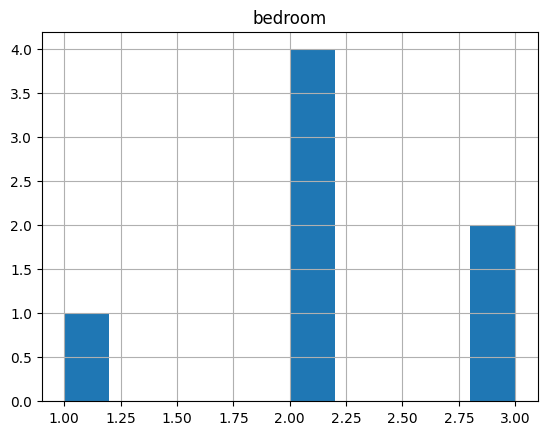

In [1603]:
df.hist()

In [1604]:
cols_to_check = ['own', 'bedroom', 'bathroom']
for i,col in enumerate(cols_to_check):
#     print(col)
    print(df.groupby(col)[cols_to_check[i]].count().head(5))
    print('-----------------')

own
12    1
N     2
Y     3
Name: own, dtype: int64
-----------------
bedroom
1    1
2    4
3    2
Name: bedroom, dtype: int64
-----------------
bathroom
1    3
2    3
3    1
Name: bathroom, dtype: int64
-----------------


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5484\1232500831.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)[cols_to_check[i]].count().head(5))


In [1605]:
# recheck
(df.area <= 0).sum()

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
(df.bathroom <= 0).sum()

TypeError: Unordered Categoricals can only compare equality or not

In [1606]:
(df.bedroom <= 0).sum()

np.int64(0)

In [1607]:
df.isnull().sum()

id          0
own         1
bedroom     0
bathroom    0
area        1
dtype: int64

# check dup

In [1608]:
df = pd.read_csv('data/data_clean6_after_clean_bedroom_dup.csv') 
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
4,Alisa,Y,2,2,1800.0
5,Alisa,Y,2,2,1200.0
6,Ksb,N,2,2,90.5
7,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [1609]:
df[df.duplicated()] # all

,id,own,bedroom,bathroom,area
7,Ksb,N,2,2,90.5


In [1610]:
df[df.duplicated('id')] # id

,id,own,bedroom,bathroom,area
5,Alisa,Y,2,2,1200.0
7,Ksb,N,2,2,90.5


In [1611]:
df[df.duplicated(['id','area'])] # 

,id,own,bedroom,bathroom,area
7,Ksb,N,2,2,90.5


In [1612]:

df.drop_duplicates(inplace=True)
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
4,Alisa,Y,2,2,1800.0
5,Alisa,Y,2,2,1200.0
6,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [1613]:

df.drop_duplicates(subset='id', inplace=True, keep='last')
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
5,Alisa,Y,2,2,1200.0
6,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [1614]:
df.sort_values('area', inplace=True)
df.drop_duplicates(subset='id', inplace=True)
df

,id,own,bedroom,bathroom,area
8,Jib,NaN,2,2,70.2
6,Ksb,N,2,2,90.5
2,Green,NaN,2,3,950.0
0,กอบ,Y,3,1,1000.0
5,Alisa,Y,2,2,1200.0
1,แนน,N,3,1,NaN
3,Shasa,Y,1,1,NaN


In [1615]:
df

,id,own,bedroom,bathroom,area
8,Jib,NaN,2,2,70.2
6,Ksb,N,2,2,90.5
2,Green,NaN,2,3,950.0
0,กอบ,Y,3,1,1000.0
5,Alisa,Y,2,2,1200.0
1,แนน,N,3,1,NaN
3,Shasa,Y,1,1,NaN


In [1616]:

df = pd.read_csv('data/data_clean6_after_clean_bedroom.csv', 
                 dtype={'bedroom':'category',
                       'bathroom':'category'}) 
df.dtypes

id            object
own           object
bedroom     category
bathroom    category
area         float64
dtype: object

In [1617]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
4,Alisa,Y,2,2,1800.0
5,Ksb,N,2,2,90.5
6,Jib,NaN,2,2,70.2


In [1618]:
df.describe()

,area
count,5.000000
mean,782.140000
std,724.034425
min,70.200000
25%,90.500000
50%,950.000000
75%,1000.000000
max,1800.000000
